## Color Perception and Palettes

### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  
 
### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook illustrates 3 contrast effects:
- Simultaneous Color Effect
- Color Contrast Effect
- Color for labeling (distinction)


## Simultaneous Color Effect

Colors of the figure below affect each other. All yellow-blue gradients are the same, but look differently depending on their background (local context).

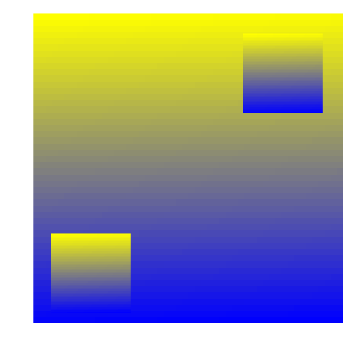

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax1 = plt.subplots()

my_map = LinearSegmentedColormap.from_list('Map', ['yellow', 'blue'])

left, bottom, width, height = [0.57, 0.65, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.25, 0.15, 0.2, 0.2]
ax3= fig.add_axes([left, bottom, width, height])

ax1.imshow(np.arange(2500).reshape(50,50), cmap=my_map, interpolation='none')
ax2.imshow(np.arange(2500).reshape(50,50), cmap=my_map, interpolation='none')
ax3.imshow(np.arange(2500).reshape(50,50), cmap=my_map, interpolation='none')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

plt.show()



## Color Contrast Effect

The following figure shows a color contrast illusion. The inset color is the same but appears to be different. The upper ellipse seems to be more violetish than the lower one according to the fact that color contrast between red & blue is hardly distinguishable. 

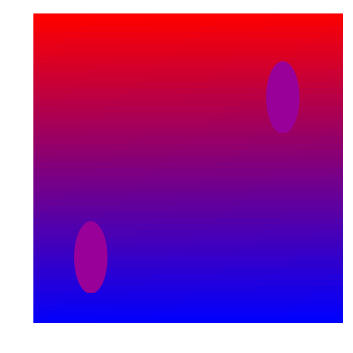

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse

# generating the background as blue-red color gradient
fig, ax1 = plt.subplots()
my_map = LinearSegmentedColormap.from_list('Map', ['red', 'blue'])
ax1.imshow(np.arange(2500).reshape(50,50), cmap=my_map, interpolation='none')

# generate the ellipses with an in-between color
el_color = '#990099'
left, bottom, width, height = [0.57, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ellipse1 = Ellipse(xy=(157.18, 68.4705), width=0.036, height=0.080, edgecolor=el_color, fc=el_color)
ax2.add_patch(ellipse1)
ax2.set_aspect('equal')
ax2.autoscale()

left, bottom, width, height = [0.25, 0.2, 0.2, 0.2]
ax3= fig.add_axes([left, bottom, width, height])
ellipse2 = Ellipse(xy=(157.18, 68.4705), width=0.036, height=0.080, edgecolor=el_color, fc=el_color)
ax3.add_patch(ellipse2)
ax3.set_aspect('equal')
ax3.autoscale()

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()


plt.show()



## Color for labeling (distinction)


The following figures consist of 3 scatter plots with the same data points. Each point has a group label assigned. In the first plot, the color for the classes follow a high saturation labeling palette, the second a low saturation palette, and the third uses gray values. The main question is to know where can class labels best distinguished. Decrease the paramter point_size to see when you can not instantly distinguish individual colors anymore in the low-saturation case. Also note, that the gray-value palette visually imposes an ordering of data points, which is not in the data.
 
The color schemes can be taken from:http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=8


In [20]:
import colorsys

# RGB 255-based VALUES of the used scheme from http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=8

#1b9e77 = 27,158,119
#d95f02 = 217,95,2
#7570b3 = 117,112,179
#e7298a = 231,41,138
#66a61e = 102,166,30
#e6ab02 = 230,171,2
#a6761d = 166,118,29
#666666 = 102,102,102

# Convert red 255-based to red percent-based value
def r_percent(r):
    r= r/255
    return r

# Convert green 255-based to green percent-based value
def g_percent(g):
    g= g/255
    return g

# Convert blue 255-based to blue percent-based value
def b_percent(b):
    b= b/255
    return b

# Get Hue(H) value in HSV
def get_hue(tuple):
    l=tuple
    return (l[0])

# Get Saturation(S) value in HSV
def get_saturation(tuple):
    l=tuple
    return (l[1])

# Get Lightness(V) value in HSV
def get_lightness(tuple):
    l=tuple
    return (l[2])

# Reducing Saturation of 70%
def reduce_saturation(s):
    s= s-(s*0.7)
    return s

#Main
def low_saturation(r,g,b):
    h =get_hue(colorsys.rgb_to_hsv(r_percent(r),g_percent(g),b_percent(b)))
    s =get_saturation(colorsys.rgb_to_hsv(r_percent(r),g_percent(g),b_percent(b)))
    v =get_lightness(colorsys.rgb_to_hsv(r_percent(r),g_percent(g),b_percent(b)))
    ls= reduce_saturation(s)
    colorsys.hsv_to_rgb(h,ls,v)

    return (colorsys.hsv_to_rgb(h,ls,v))
   
    
# Get RGB 255-based VALUES of the palette used from http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=8

'''#1b9e77 = 27,158,119
#d95f02 = 217,95,2
#7570b3 = 117,112,179
#e7298a = 231,41,138
#66a61e = 102,166,30
#e6ab02 = 230,171,2
#a6761d = 166,118,29
#666666 = 102,102,102'''


high_saturated_colors= ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
low_saturated_colors = [low_saturation(27,158,119),low_saturation(217,95,2),low_saturation(117,112,179)
                         ,low_saturation(231,41,138),low_saturation(102,166,30),low_saturation(230,171,2),
                         low_saturation(166,118,29),low_saturation(102,102,102)]


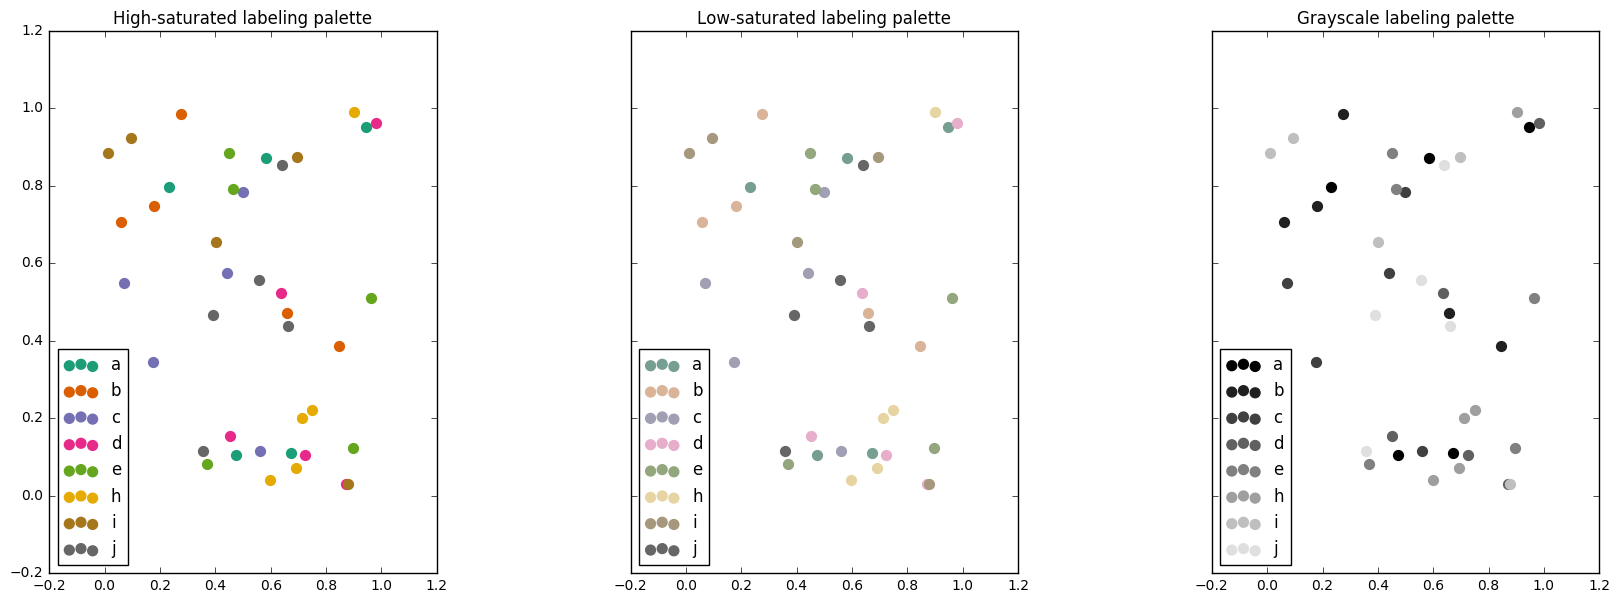

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

 
# Create data, 8 groups with 5 random points in each group
N = 5
g1 = (np.random.rand(N), np.random.rand(N))
g2 = (np.random.rand(N), np.random.rand(N))
g3 = (np.random.rand(N), np.random.rand(N)) 
g4 = (np.random.rand(N), np.random.rand(N)) 
g5 = (np.random.rand(N), np.random.rand(N)) 
g6 = (np.random.rand(N), np.random.rand(N)) 
g7 = (np.random.rand(N), np.random.rand(N)) 
g8 = (np.random.rand(N), np.random.rand(N)) 


f,(ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,7), sharey=True)

# Define point size, default = 50, try 20 for instance
point_size= 50

# High-saturated labeling palette
data = (g1, g2, g3, g4, g5, g6,g7, g8)
colors= high_saturated_colors
groups = ("a", "b", "c", "d","e","h","i","j") 

for data,color,group in zip(data,colors,groups ):
    x, y = data
    ax1.scatter(x, y, c= color, label=group, s=point_size, edgecolors= color)
ax1.set_title('High-saturated labeling palette')
ax1.legend(loc=3)

# Low-saturated labeling palette
data = (g1, g2, g3, g4, g5, g6,g7, g8)
colors=[[i] for i in low_saturated_colors]
groups = ("a", "b", "c", "d","e","h","i","j") 

for data,color,group in zip(data,colors,groups):
    x, y = data
    ax2.scatter(x, y, c= color, label=group , s=point_size, edgecolors= color)
ax2.set_title('Low-saturated labeling palette')
ax2.legend(loc=3)

# Grayscale labeling palette
data = (g1, g2, g3, g4, g5, g6,g7, g8)
groups = ("a", "b", "c", "d","e","h","i","j") 
n=8
colors= ['%f' % (i/float(n)) for i in range(n)]

for data,color,group in zip(data,colors,groups):
    x, y = data
    ax3.scatter(x, y, c= color, label=group, s=point_size, edgecolors= color)
ax3.set_title('Grayscale labeling palette')
ax3.legend(loc=3)        


f.subplots_adjust(wspace=0.5)
plt.show()